In [1]:
!pip install tensorflow===2.3.0


     |████████████████████████████████| 320.4 MB 40 kB/s 
     |████████████████████████████████| 459 kB 8.3 MB/s 
     |████████████████████████████████| 20.1 MB 11.0 MB/s 
     |████████████████████████████████| 2.9 MB 28.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
 

In [2]:
import tensorflow as tf
#print(tf.__version__)

In [3]:
from tensorflow import keras

In [4]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 5.4 MB/s 


In [5]:
import keras_tuner as kt

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

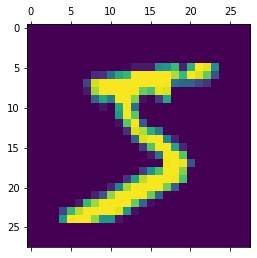

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]

5

In [14]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train.reshape(len(X_train),28*28) #

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
X_train = X_train / 255 # we are doing scaling here  for that we divide each value by 255
                        # by dividing it will be scaled from 0 to 1. 
X_test = X_test / 255 

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28) # we want to convert 28 x 28 image into single dimensional array
                                                      # we use above two line for flattening it . 

In [21]:
X_train_flattened.shape

(60000, 784)

In [22]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
X_test_flattened.shape

(10000, 784)

In [24]:
model = keras.Sequential([  # Sequential means having a stack of layers in my neural network and since it is a stack 
                            # it will accept every layer as one element.. first element is input but keras has this 
                            # API where we can say keras.layers.Dense
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')# keras.layers.Dense is the API of keras
]) # dense means all the neurons(x1, x2, x3 -------, xn) in one layer are connected with every other neurons 
   # in the second layer that is why it is called dense 
  # here 10 is output layers and 784 is input layers
model.compile(optimizer='adam', # optimizer allows us to do train efficiently basically when the 
                                # backward propagation and training is going on , optimizer will allow us to reach 
                                # global optima in efficient way
              loss='sparse_categorical_crossentropy', # second parameter is 'loss' for that we use sparse_categorical_crossentropy
              # because our output class are categorical because we have categories basically 0 to 9 
              # we have 10 classes in our output
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)  # fit is where the training actually happens so we are supplying here training set basically
  # X train is flattened and y train is not flattened bcoz it is a simple array

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4931 - accuracy: 0.8761
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3064 - accuracy: 0.9156
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2859 - accuracy: 0.9205
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2751 - accuracy: 0.9236
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2679 - accuracy: 0.9262
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2629 - accuracy: 0.9274
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2589 - accuracy: 0.9287
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2555 - accuracy: 0.9296
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2529 - accuracy: 0.9304
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 848us/step - loss: 0.2590 - accuracy: 0.9291


[0.25904691219329834, 0.929099977016449]

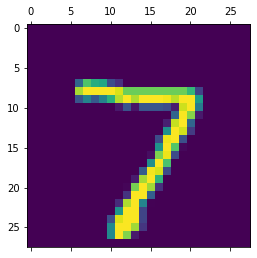

In [27]:
plt.matshow(X_test[0])

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([8.57135518e-08, 1.03546601e-14, 3.96335423e-07, 2.13825703e-03,
       5.59167503e-08, 2.83495447e-05, 1.05899535e-13, 7.11369932e-01,
       1.36433791e-05, 1.73926353e-04], dtype=float32)

In [30]:
np.argmax(y_predicted[0]) # it will find the maximum value and pront the index number

7

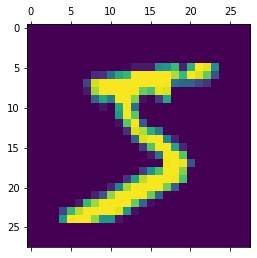

In [29]:
plt.matshow(X_train[0])

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [35]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm   # y_test is truth data  # cm is confusion matrix 

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    1,    2,    1,    7,    9,    4,    2,    0],
       [   0, 1115,    3,    1,    0,    1,    4,    2,    9,    0],
       [   4,    8,  936,   12,    8,    5,   11,   11,   34,    3],
       [   2,    0,   18,  912,    1,   29,    3,   10,   29,    6],
       [   1,    1,    4,    2,  927,    0,    8,    6,   10,   23],
       [   7,    2,    2,   27,    8,  793,   13,    7,   30,    3],
       [  10,    3,    7,    1,    7,   16,  910,    1,    3,    0],
       [   1,    7,   23,    4,    7,    2,    0,  958,    2,   24],
       [   5,    8,    5,   16,    9,   29,    5,    9,  879,    9],
       [   8,    8,    1,    8,   25,    9,    0,   32,   11,  907]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

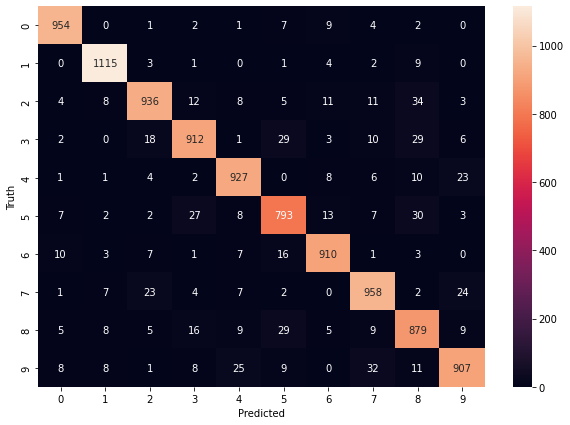

In [36]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 960 times label was zero and our model predicted it to be 0. 
# 0th prediction was correct 960 times

# 1117 times it was 1 and our model predicted it to be 1 

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # this is hidden layer
    keras.layers.Dense(70, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3915 - accuracy: 0.8834
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1661 - accuracy: 0.9530
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1168 - accuracy: 0.9657
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9748
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0708 - accuracy: 0.9787


In [39]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9739


[0.08284744620323181, 0.9739000201225281]

In [42]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5, callbacks = [tb_callback])

Epoch 1/5
   1/1875 [..............................] - ETA: 0s - loss: 2.2496 - accuracy: 0.1562WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8849 - accuracy: 0.7837
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3634 - accuracy: 0.8991
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.9121
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2825 - accuracy: 0.9198
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2607 - accuracy: 0.9270


In [43]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.9312


[0.24349863827228546, 0.9312000274658203]

Text(69.0, 0.5, 'Truth')

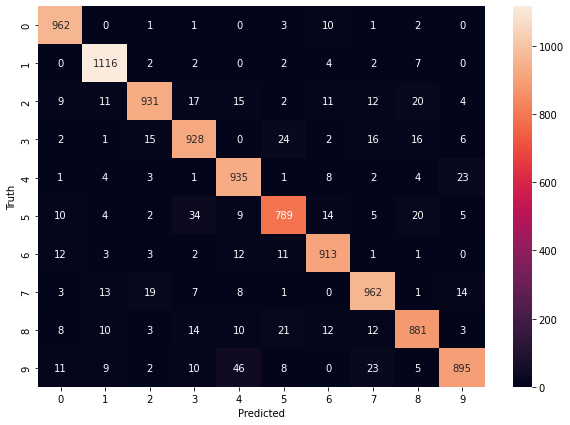

In [44]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.9181
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1405 - accuracy: 0.9596
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1009 - accuracy: 0.9696
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0791 - accuracy: 0.9761
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0624 - accuracy: 0.9811
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9851
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0429 - accuracy: 0.9866
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9889
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0299 - accuracy: 0.9910
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.025